# Tech-Salary-Prediction-by-Machine-Learning

### Predictive Modeling for finding salary in USD for techies in AI , Machine Learning and Data Science roles in the year 2020-2025 using Machine Learning Algorithms

### Stage 1 - Importing All the necessary Libraries 

In [61]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [62]:
df=pd.read_csv('The AI, ML, Data Science Salary (2020- 2025).csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M


In [63]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
88579,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
88580,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
88581,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
88582,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
88583,2021,SE,FT,Data Scientist,7000000,INR,94665,IN,50,IN,L


In [64]:
## Dropping unwanted columns for easy handling and  enhances performance of the model

df.drop(columns=['salary','salary_currency'],inplace=True)
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,US,0,US,M
...,...,...,...,...,...,...,...,...,...
88579,2020,SE,FT,Data Scientist,412000,US,100,US,L
88580,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
88581,2020,EN,FT,Data Scientist,105000,US,100,US,S
88582,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


### Stage 3 -Exploring the  Data

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary_in_usd       88584 non-null  int64 
 5   employee_residence  88584 non-null  object
 6   remote_ratio        88584 non-null  int64 
 7   company_location    88584 non-null  object
 8   company_size        88584 non-null  object
dtypes: int64(3), object(6)
memory usage: 6.1+ MB


In [66]:
df.describe()

,work_year,salary_in_usd,remote_ratio
count,88584.000000,88584.000000,88584.000000
mean,2024.034758,157567.798417,21.286011
std,0.620370,73531.373158,40.831018
min,2020.000000,15000.000000,0.000000
25%,2024.000000,106097.250000,0.000000
50%,2024.000000,146307.000000,0.000000
75%,2024.000000,198600.000000,0.000000
max,2025.000000,800000.000000,100.000000


In [67]:
## Shape of the Dataset

print (f'Number of rows in a Dataset : {df.shape[0]}')
print (f'Number of columns in a Dataset :{df.shape[1]}')

Number of rows in a Dataset : 88584
Number of columns in a Dataset :9


In [68]:
df.columns.tolist()

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [69]:
### Checking for unique values 
df.nunique()

work_year                6
experience_level         4
employment_type          4
job_title              312
salary_in_usd         9164
employee_residence      96
remote_ratio             3
company_location        90
company_size             3
dtype: int64

In [70]:
### Checking for unique values in each column
for column in df.columns :
    unique_values=df[column].unique()
    print (f'Column Name:{column}')
    print (f'Unique values({len(unique_values)}):{unique_values}')
    print (' -------------------------- ')
    print()

Column Name:work_year
Unique values(6):[2025 2024 2022 2023 2020 2021]
 -------------------------- 

Column Name:experience_level
Unique values(4):['MI' 'SE' 'EN' 'EX']
 -------------------------- 

Column Name:employment_type
Unique values(4):['FT' 'CT' 'PT' 'FL']
 -------------------------- 

Column Name:job_title
Unique values(312):['Customer Success Manager' 'Engineer' 'Applied Scientist' 'Data Analyst'
 'Software Development Engineer' 'Research Scientist' 'Data Scientist'
 'Platform Engineer' 'Computational Biologist' 'AI Data Scientist'
 'Admin & Data Analyst' 'Cloud Engineer' 'Data Management Specialist'
 'Data Product Owner' 'Software Engineer' 'Machine Learning Engineer'
 'Associate' 'Data Engineer' 'Product Manager' 'Data Operations Engineer'
 'Business Intelligence Engineer' 'Research Engineer' 'Analytics Engineer'
 'Analyst' 'Actuarial Analyst' 'Manager' 'Architect' 'Software Developer'
 'Member of Technical Staff' 'BI Analyst' 'AI Engineer'
 'Data Governance Analyst' 'Deve

In [71]:
## checking the length of the data 
len(df)

88584

In [72]:
### Checking for duplicated values 

df.duplicated().sum()

np.int64(44355)

In [73]:
## for Viewing  duplicates 
df[df.duplicated()] 

## Since the dataset does not contain any truly identical datas across all columns, rows cannot be dropped as it may affect
## the integrity of the datas and information it may convey !

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
18,2025,MI,FT,AI Data Scientist,200000,US,100,US,S
32,2025,EN,FT,Research Scientist,358000,US,0,US,M
33,2025,EN,FT,Research Scientist,187040,US,0,US,M
34,2025,EN,FT,Research Scientist,266000,US,0,US,M
35,2025,EN,FT,Research Scientist,177688,US,0,US,M
...,...,...,...,...,...,...,...,...,...
88287,2022,SE,FT,Data Engineer,115000,US,100,US,M
88372,2021,MI,FT,Data Scientist,150000,US,100,US,M
88426,2021,MI,FT,Data Engineer,200000,US,100,US,L
88506,2021,EN,FT,Data Scientist,90000,US,100,US,S


In [74]:
### Checking for  null values 

In [75]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Stage 4 -Exploring the  Data through Visualisation 

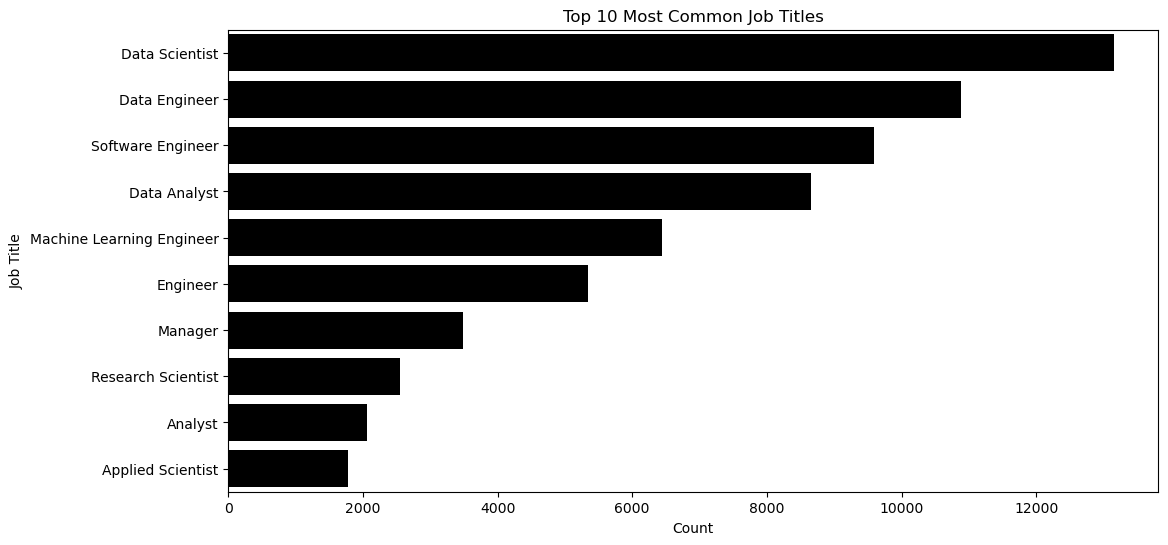

In [76]:
# 1. Countplot: Job Title Distribution 
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='job_title', order=df['job_title'].value_counts().index[:10],color='black')
plt.title("Top 10 Most Common Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")

plt.show()


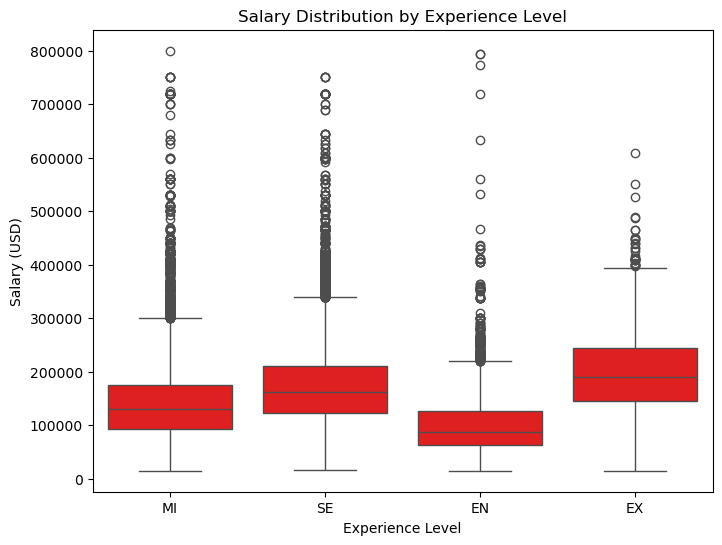

In [77]:
##2. Boxplot: Salary vs. Experience Level

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd',color='red')
plt.title("Salary Distribution by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.show()


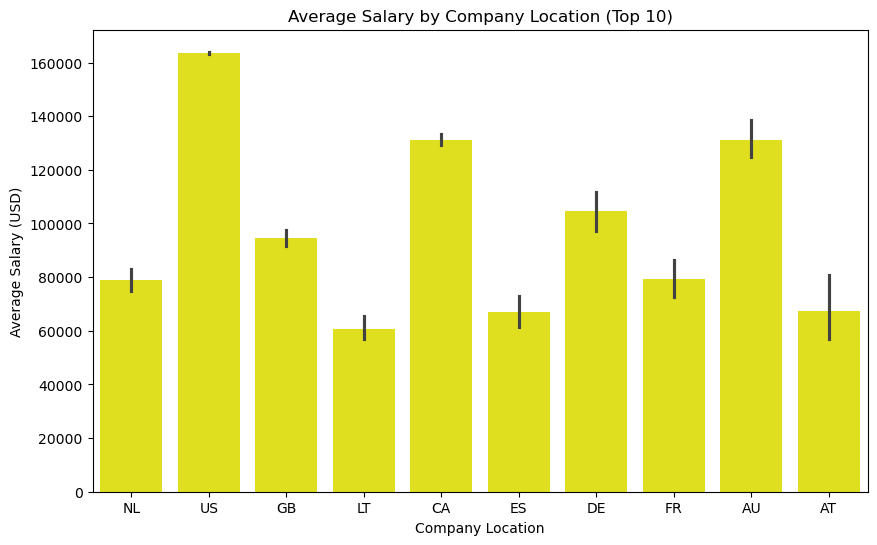

In [78]:
##3.Barplot: Average Salary by Company Location
top_locations = df['company_location'].value_counts().index[:10]
plt.figure(figsize=(10,6))
sns.barplot(data=df[df['company_location'].isin(top_locations)],
            x='company_location', y='salary_in_usd',color='yellow')
plt.title("Average Salary by Company Location (Top 10)")
plt.xlabel("Company Location")
plt.ylabel("Average Salary (USD)")
plt.show()


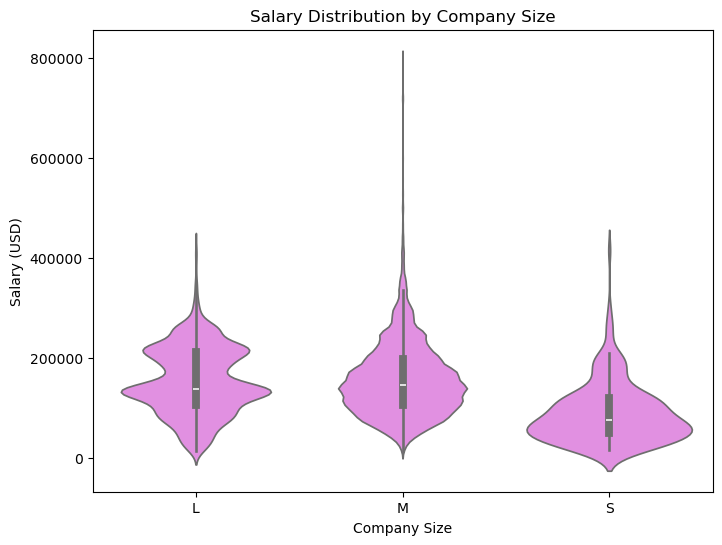

In [79]:
##  4. Violin Plot: Salary vs. Company Size

plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='company_size', y='salary_in_usd',color='violet')
plt.title("Salary Distribution by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Salary (USD)")
plt.show()


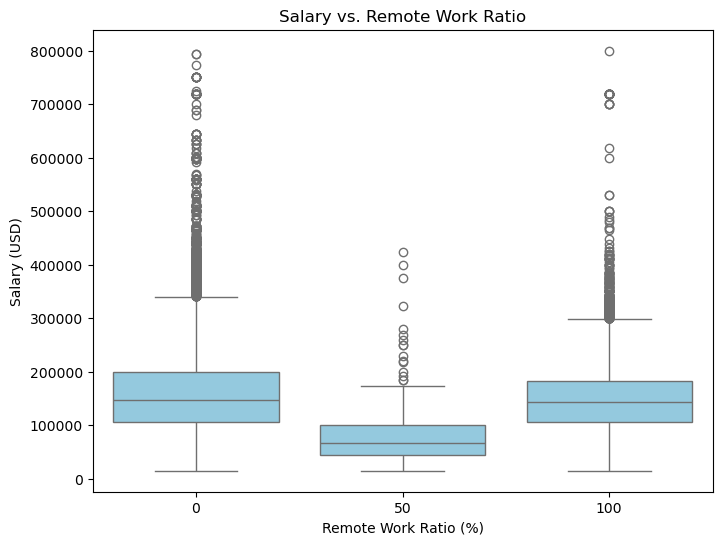

In [80]:
## 5. Boxplot: Salary by Remote Work Ratio
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='remote_ratio', y='salary_in_usd',color='skyblue')
plt.title("Salary vs. Remote Work Ratio")
plt.xlabel("Remote Work Ratio (%)")
plt.ylabel("Salary (USD)")
plt.show()


C:\Users\MOHAMMED YAZIN N\AppData\Local\Temp\ipykernel_10632\4281714814.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='work_year', y='salary_in_usd',ci=None)


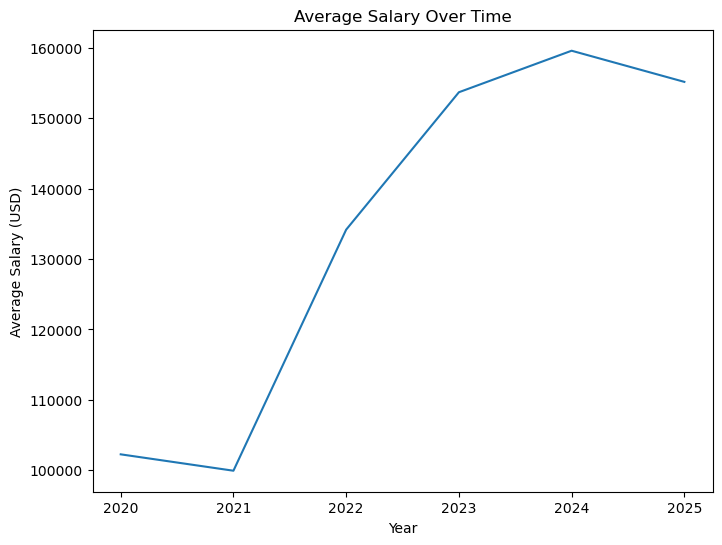

In [81]:
## 6.Trend Over Time 
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x='work_year', y='salary_in_usd',ci=None)
plt.title("Average Salary Over Time")
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.show()


### Stage 5 - Seperating Categorical Columns and Numerical Columns 

In [82]:
cat_columns= df[[
'experience_level',
'employment_type',
'job_title',
'employee_residence',
'company_location',
'company_size'
]]

cat_columns

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
0,MI,FT,Customer Success Manager,NL,NL,L
1,SE,FT,Engineer,US,US,M
2,SE,FT,Engineer,US,US,M
3,SE,FT,Applied Scientist,US,US,M
4,SE,FT,Applied Scientist,US,US,M
...,...,...,...,...,...,...
88579,SE,FT,Data Scientist,US,US,L
88580,MI,FT,Principal Data Scientist,US,US,L
88581,EN,FT,Data Scientist,US,US,S
88582,EN,CT,Business Data Analyst,US,US,L


In [83]:
num_columns= df.drop(columns=[
'experience_level',
'employment_type',
'job_title',
'employee_residence',
'company_location',
'company_size'
])

num_columns

,work_year,salary_in_usd,remote_ratio
0,2025,60000,50
1,2025,165000,0
2,2025,109000,0
3,2025,294000,0
4,2025,137600,0
...,...,...,...
88579,2020,412000,100
88580,2021,151000,100
88581,2020,105000,100
88582,2020,100000,100


In [84]:
## checking Outliers 
for  col in num_columns :
    Q1= df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    print(f"{col} ---> Q1 = {Q1}, Q3 = {Q3}")
   

work_year ---> Q1 = 2024.0, Q3 = 2024.0
salary_in_usd ---> Q1 = 106097.25, Q3 = 198600.0
remote_ratio ---> Q1 = 0.0, Q3 = 0.0


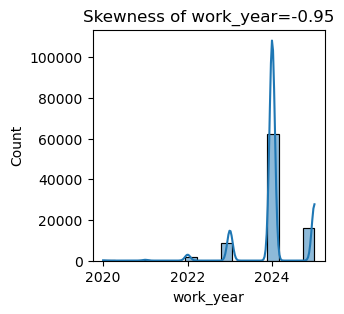

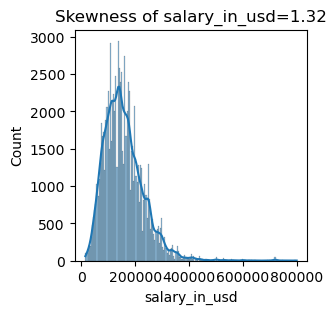

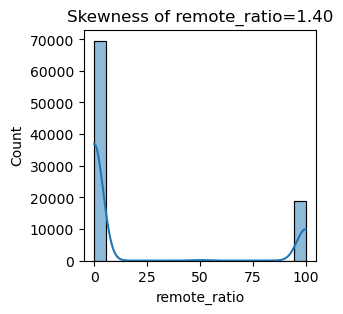

In [85]:
# skewness check
for col in num_columns:
    plt.figure(figsize=(3, 3))
    sns.histplot(df[col], kde=True)
    skew_value=df[col].skew()
    plt.title(f'Skewness of {col}={skew_value:.2f}')
    plt.show()

In [86]:
## Treating  outliers using IQR method 

Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
outliers_lower = Q1 - 1.5 * IQR
outliers_upper = Q3 + 1.5 * IQR

In [87]:
## to identify the outlier


df[(df['salary_in_usd']<outliers_lower) | (df['salary_in_usd']>outliers_upper)]                                     

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
30,2025,EN,FT,Research Scientist,358000,US,0,US,M
32,2025,EN,FT,Research Scientist,358000,US,0,US,M
190,2025,SE,FT,Engineer,600593,US,0,US,M
264,2025,SE,FT,Engineer,431250,US,100,US,M
342,2025,SE,FT,Software Engineer,384200,US,0,US,M
...,...,...,...,...,...,...,...,...,...
88314,2022,SE,FT,Applied Data Scientist,380000,US,100,US,L
88366,2020,MI,FT,Research Scientist,450000,US,0,US,M
88511,2021,EX,CT,Principal Data Scientist,416000,US,100,US,S
88576,2021,MI,FT,Applied Machine Learning Scientist,423000,US,50,US,L


In [88]:
## trimming the outiers


trimmed_df= df[(df['salary_in_usd']>=outliers_lower) & (df['salary_in_usd'] <=outliers_upper)]
trimmed_df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,US,0,US,M
...,...,...,...,...,...,...,...,...,...
88578,2021,SE,FT,Data Specialist,165000,US,100,US,L
88580,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
88581,2020,EN,FT,Data Scientist,105000,US,100,US,S
88582,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


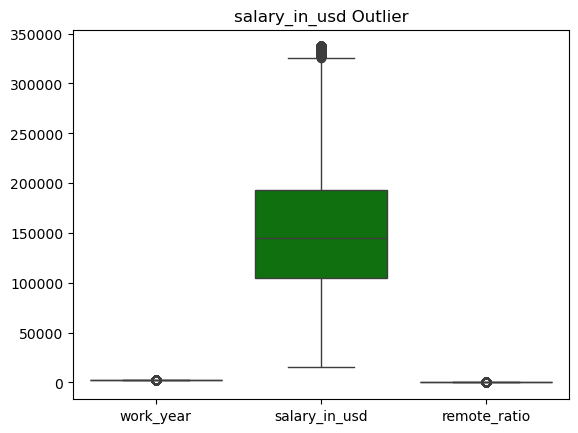

In [89]:
sns.boxplot(data = trimmed_df,color='green')
plt.title ('salary_in_usd Outlier')
plt.show()



In [90]:
## Make sure that Columns is in float before capping 
float_df= trimmed_df.copy()
float_df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,US,0,US,M


In [91]:
float_df['salary_in_usd']=float_df['salary_in_usd'].astype(float)

# Capping  the outliers to 1.5 times IQR
float_df['salary_in_usd']=float_df['salary_in_usd'].clip(lower=Q1-1.5*IQR,upper=Q3+1.5*IQR)


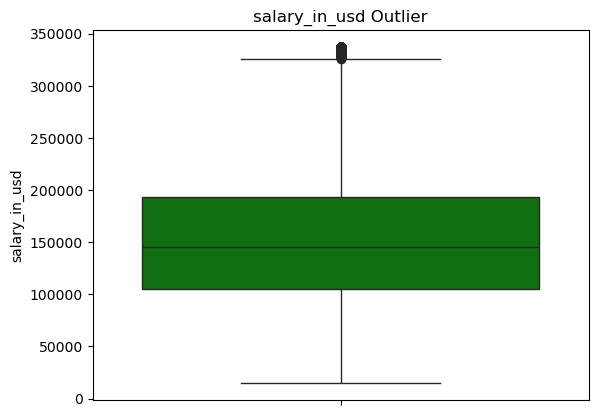

In [92]:
sns.boxplot(data=float_df['salary_in_usd'],color='green')
plt.title (('salary_in_usd Outlier'))
plt.show()



In [114]:
## Skewness Correction 

df['salary_in_usd_log']=np.log1p(df['salary_in_usd'])
print("Skewness after log1p:", df['salary_in_usd_log'].skew())

Skewness after log1p: -0.5184605527262305


### Stage 6 -Data Encoding: Converting categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

In [93]:
## initialising one hot encoder 
ohe=OneHotEncoder(sparse_output=False )

In [94]:
# Fit and transform the data 
encoded= ohe.fit_transform(cat_columns)
encoded

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [95]:
encoded_df=pd.DataFrame(encoded,columns=ohe.get_feature_names_out(ohe.feature_names_in_))
encoded_df

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Architect,job_title_AI Data Engineer,...,company_location_UA,company_location_US,company_location_VE,company_location_VN,company_location_XK,company_location_ZA,company_location_ZM,company_size_L,company_size_M,company_size_S
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88579,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
88580,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
88581,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
88582,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [96]:
## Adding new DataFrame to the Old Numeric Data

new_df=pd.concat([encoded_df , num_columns],axis=1)
new_df

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Architect,job_title_AI Data Engineer,...,company_location_VN,company_location_XK,company_location_ZA,company_location_ZM,company_size_L,company_size_M,company_size_S,work_year,salary_in_usd,remote_ratio
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2025,60000,50
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,165000,0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,109000,0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,294000,0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,137600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88579,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2020,412000,100
88580,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2021,151000,100
88581,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2020,105000,100
88582,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2020,100000,100


In [97]:
## Checking the data types 

new_df.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [98]:
## Seperating the Inputs 
X= new_df.drop(['salary_in_usd'],axis=1)
X

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Architect,job_title_AI Data Engineer,...,company_location_VE,company_location_VN,company_location_XK,company_location_ZA,company_location_ZM,company_size_L,company_size_M,company_size_S,work_year,remote_ratio
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2025,50
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88579,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2020,100
88580,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2021,100
88581,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2020,100
88582,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2020,100


In [99]:
y= new_df['salary_in_usd']
y

0         60000
1        165000
2        109000
3        294000
4        137600
          ...  
88579    412000
88580    151000
88581    105000
88582    100000
88583     94665
Name: salary_in_usd, Length: 88584, dtype: int64

## Stage 7 - Performing  Training and Testing to the dataset 

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print(f'Train_data_shape: {X_train.shape}')
print(f'Testing_Size : {X_test.shape}')

Train_data_shape: (70867, 511)
Testing_Size : (17717, 511)


In [101]:
X_train

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Architect,job_title_AI Data Engineer,...,company_location_VE,company_location_VN,company_location_XK,company_location_ZA,company_location_ZM,company_size_L,company_size_M,company_size_S,work_year,remote_ratio
83557,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2023,50
52852,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024,0
64500,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024,0
84917,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2023,0
76600,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,100
54886,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024,0
76820,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024,0
860,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,0


In [102]:
X_test

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Architect,job_title_AI Data Engineer,...,company_location_VE,company_location_VN,company_location_XK,company_location_ZA,company_location_ZM,company_size_L,company_size_M,company_size_S,work_year,remote_ratio
24134,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024,0
37468,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024,0
84508,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2023,0
12635,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,0
87261,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2022,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68457,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024,0
74772,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024,0
52888,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024,0
15798,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,0


In [103]:
y_train

83557     67419
52852    200000
64500    177000
84917    105380
76600     55200
          ...  
6265     200000
54886    560000
76820    120000
860       89250
15795    161000
Name: salary_in_usd, Length: 70867, dtype: int64

In [104]:
y_test

24134     90000
37468     66000
84508    196000
12635    175500
87261    192564
          ...  
68457     32332
74772     75300
52888    144900
15798    240400
71584    100000
Name: salary_in_usd, Length: 17717, dtype: int64

### Stage 8 - Feature Scaling:

#### After the process of encoding, we perform the scaling of the features using standardscaler or minmaxscale

In [115]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

print("Feature scaling complete.")
print("Moving to Machine Learning Model Buliding !")

Feature scaling complete.
Moving to Machine Learning Model Buliding !
